# Ground Station RX Chain Testing

## Testing against satelites

Following satelites share our frequency range.  We can compare our signal strengh to other stations to get an idea of relative gain.

### ARKYD 6A (43130)

Example observation with omni antenna https://network.satnogs.org/observations/3577144/
Example observation with upward facing Yagi https://network.satnogs.org/observations/2659616/

### NOUR 01 (45529)

### Unknown (99767)

## Parking Garage Gain Test

Take an antenna with a known gain to the parking garage with a reference transmitter emmiting a CW signal.  Use the FSH4 to measure the power from the transmitter that would be going into the antenna.  Then hook up the antenna and transmit.  Point the ground station antenna at the antenna on the parking garage.  Use the FSH4 to measure the received signal strength plugged in where the B200 Mini is plugged in.  Check that all the gains losses add up to the change in signal strength.

Additionaly measure the noise floor at 401.365MHz with the FSH4.  Measure the PSD.  Make sure to use the LNA enable option and disable any attenuation to make sure you minimize the FSH4s internal noise.

# Polarcube Observations

We need more data on how often we can see polarcube.  So far we have only seen it in 1 pass of 3 we have taken data for.

One option for automating this is the SatNOGs software stack.  Currently atleast for recording the IQ the GNU Radio code is not automated.  The antenna pointing is automatic if setup correctly.  We can either write some scripts to automate running IQ recording with GNU Radio (probably easier).  Or we can setup a SatNOGS node to do recording, or recording and antenna pointing.

https://network.satnogs.org/observations/3596311/

# Ground Station Noise

We need to characterize the noise around 401MHz for the ground station.  The noise appears to be local to the boulder area.  If we can locate the source of this noise and it is unintentional interference we can have it fixed/turned off.

In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.signal.signaltools as sigtool
import scipy.signal as signal

In [50]:
data4 = np.fromfile('002b_2146_JAN31.IQ', dtype=np.csingle)
Fs=460800

<IPython.core.display.Javascript object>


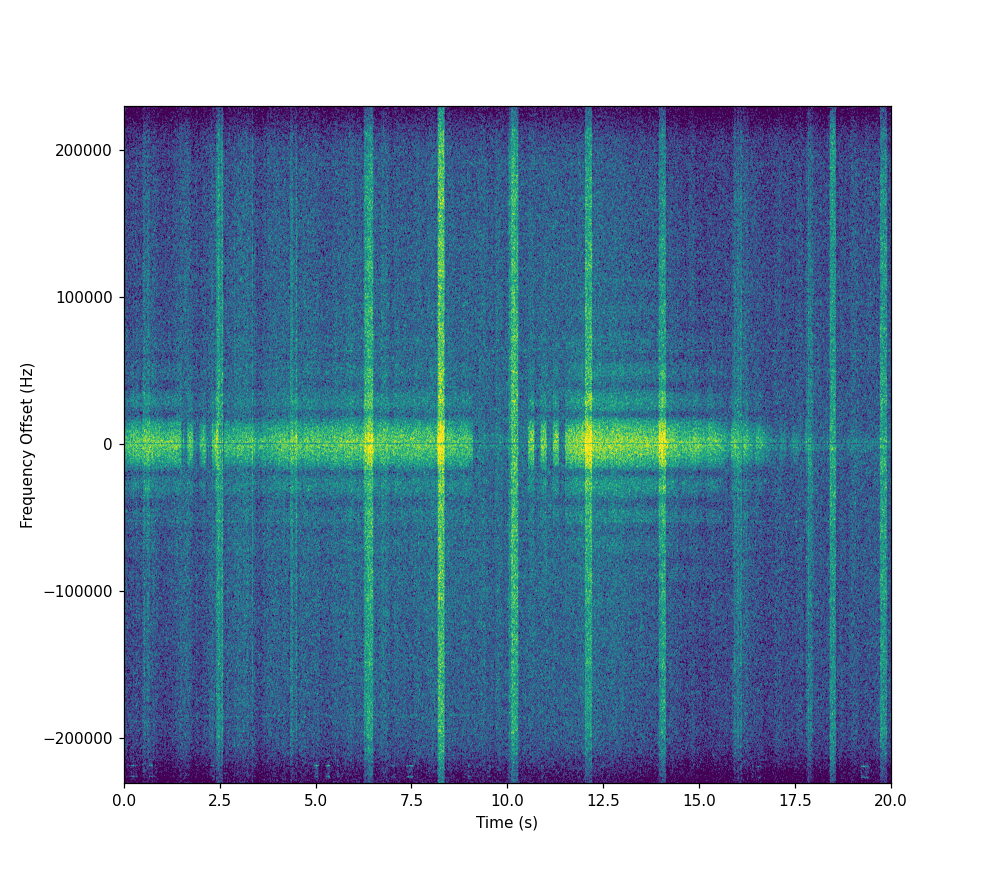

Text(0.5, 0, 'Time (s)')

In [52]:
n=4
subset = data4[(20*Fs)*n:(20*Fs)*(n+1)]
plt.figure(figsize=[9,8])
Pxx, freqs, bins, im = plt.specgram(subset, NFFT=NFFT, Fs=Fs, noverlap=0, vmax=-112, vmin=-125)
plt.ylabel("Frequency Offset (Hz)")
plt.xlabel("Time (s)")

<IPython.core.display.Javascript object>


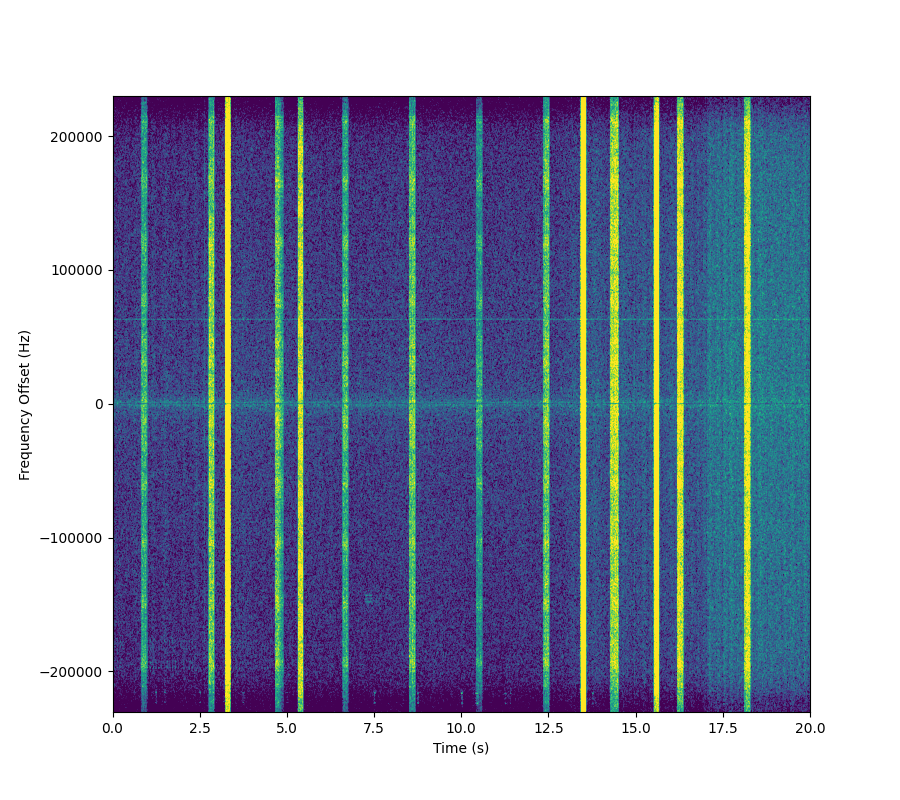

Text(0.5, 0, 'Time (s)')

In [47]:
n=18
subset = data4[(20*Fs)*n:(20*Fs)*(n+1)]
plt.figure(figsize=[9,8])
Pxx, freqs, bins, im = plt.specgram(subset, NFFT=NFFT, Fs=Fs, noverlap=0, vmax=-112, vmin=-125)
plt.ylabel("Frequency Offset (Hz)")
plt.xlabel("Time (s)")

<IPython.core.display.Javascript object>


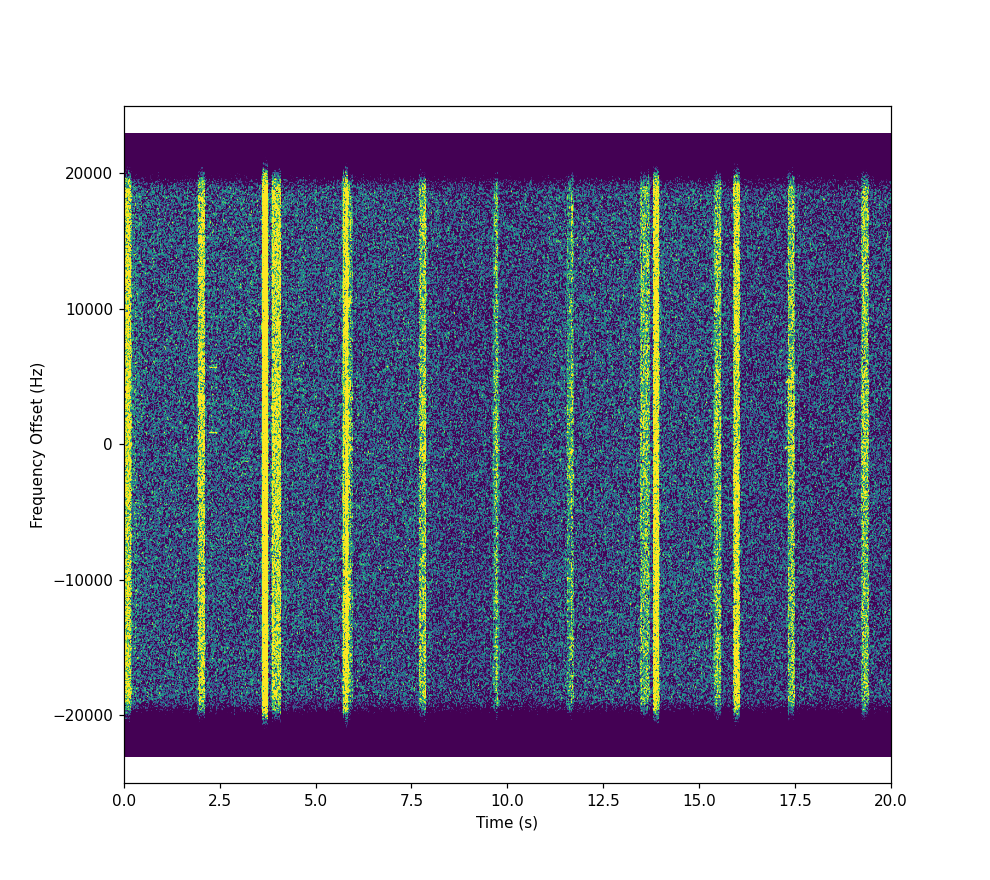

(-25000.0, 25000.0)

In [55]:
n=19
subset = data4[(20*Fs)*n:(20*Fs)*(n+1)]
subset = subset * np.exp(-1.0j*2.0*np.pi* -150000/Fs*np.arange(len(subset)))
subset = signal.decimate(subset, 10)
plt.figure(figsize=[9,8])
Pxx, freqs, bins, im = plt.specgram(subset, NFFT=NFFT, Fs=Fs/10, noverlap=0, vmax=-112, vmin=-125)
plt.ylabel("Frequency Offset (Hz)")
plt.xlabel("Time (s)")
plt.ylim(-25000,25000)

<IPython.core.display.Javascript object>


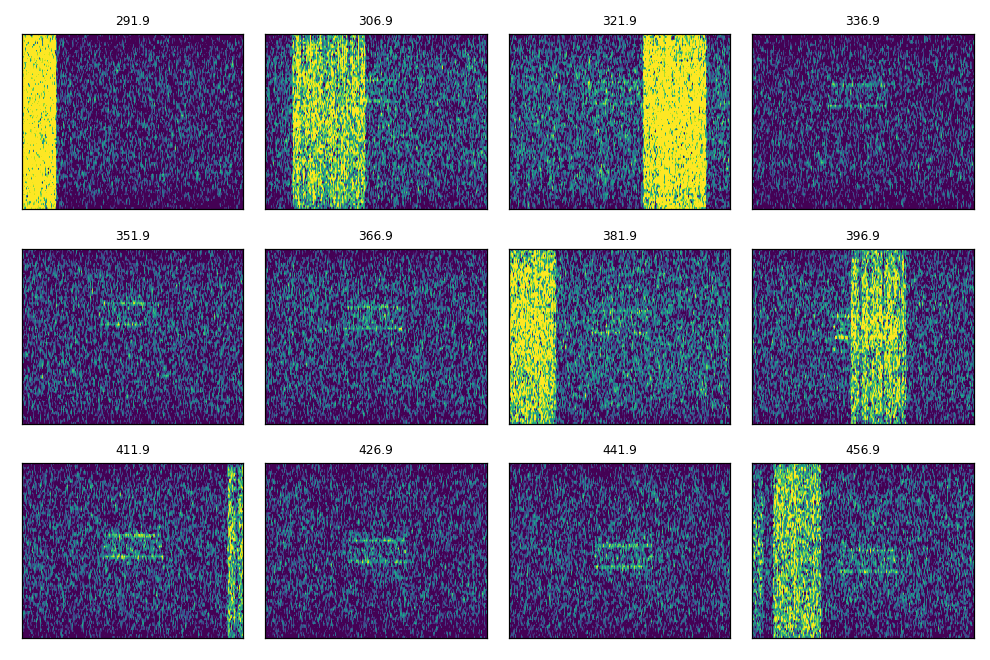

In [57]:
start = 306.95-15
length = 0.35
time = start*Fs

w = 4
h = 3
fig, axes = plt.subplots(figsize=(9,6), nrows=h, ncols=w)

for i in range(int(w*h)):

    subset = data4[int(time):int(time+0.75*Fs)]

    y = subset
    y = y * np.exp(-1.0j*2.0*np.pi* -150000/Fs*np.arange(len(y)))
    
    nyq = 0.5 * Fs
    normalCutoff = 20e3 / nyq
    b, a = signal.butter(3, normalCutoff, btype='low')
    y = signal.lfilter(b, a, y)
    
    axes[int(i/w),i%w].set_title(f'{time/Fs:.1f}', fontsize=8)
    Pxx, freqs, bins, im = axes[int(i/w),i%w].specgram(y, NFFT=NFFT, Fs=Fs, noverlap=0, vmax=-112, vmin=-125)
    axes[int(i/w),i%w].set_ylim(-20000,20000)
    axes[int(i/w),i%w].get_yaxis().set_visible(False)
    axes[int(i/w),i%w].get_xaxis().set_visible(False)

    #axes[int(i/w)*2+1,i%w].plot(y)
    #axes[int(i/w)*2+1,i%w].get_yaxis().set_visible(False)
    #axes[int(i/w)*2+1,i%w].get_xaxis().set_visible(False)
    
    time += 15*Fs
    
plt.tight_layout()

456.95


<IPython.core.display.Javascript object>


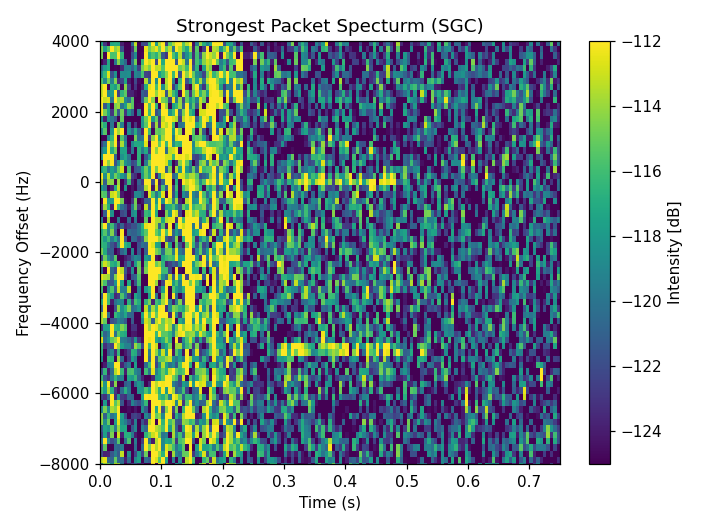

In [54]:
time = (start+11*15)*Fs

print(time/Fs)

subset = data4[int(time):int(time+0.75*Fs)]

y = subset
y = y * np.exp(-1.0j*2.0*np.pi* -150000/Fs*np.arange(len(y)))
y = signal.decimate(y, 10)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Strongest Packet Specturm (SGC)")
plt.ylabel("Frequency Offset (Hz)")
plt.xlabel("Time (s)")
Pxx, freqs, bins, im = ax.specgram(y, NFFT=256, Fs=Fs/10, noverlap=0, vmax=-112, vmin=-125)
ax.set_ylim(-8000,4000)
plt.colorbar(im).set_label('Intensity [dB]')
plt.tight_layout()